#Problem 1

An ascending clock auction is an auction where the seller starts bidding at a low price and gradually raises the price as the auction progresses. As the price increases, bidders can choose to stay in the auction (bid for the item at the clock price) or drop out and forgo their chance at winning the item. The clock price is usually raised by a fixed discrete increment. The auction ends when there is only one bidder remaining. The winning bidder gets the item and pays the posted price (clock price from the last round with multiple bidders).

 

Example: A seller is auctioning off a baseball card. The starting auction price is \$10 and the clock increment is \$1. In the first round of bidding there are 5 people who place bids of \$10. The seller then raises the price to \$11 and bidding continues until there is only one bidder willing to pay the clock price. Say this continues until the clock price is \$15 and there are two bidders left. If one bidder drops out, the remaining bidder wins the baseball card and pays the posted price of \$14.

You will need to write a Monte Carlo simulation to estimate the seller revenue from an ascending clock auction. For this assignment, assume the following parameters:

* There are 5 buyers
* Buyer values are drawn between 0 and 100 in increments of 5
* Seller reserve prices are allowed to be between 0 and 100 in increments of 5
* The item is considered sold when the clock price is greater than or equal to the reserve price
* The auction ends when there is one or less buyers bidding at the clock price.
*In the case of two buyers dropping out at the same price, you can go back to the previous price and randomly choose the winning buyer.
 
<ol type="a">
  <li>
  What is the expected revenue if there are 5 buyers and the clock increment is &#36;1?
  </li>
  <li>What is the expected revenue if there are 5 buyers and the clock increment is &#36;10?  How did the increment affect the expected revenue and why does it have that effect?</li>
  <li>What is the expected revenue if there are 20 buyers with a clock increment of &#36;1? Compare with item (a) and explain the difference.</li>
</ol>




 

Let's extend our Monte Carlo simulation of the ascending clock auction to allow the seller to choose a reserve price. A reserve price is the minimum price a seller is willing to accept to sell the item. If the final clock price is below the reserve price the seller receives zero revenue. This means the auction now ends when either there are zero buyers bidding at the current clock price, or there is one buyer bidding and the reserve price has been met.

 
<ol start='4' type='a'>
  <li>What reserve price should the seller choose (which price generates the most revenue)? Provide an illustration that supports your result.</li>
</ol>

# Solution
So we know that when we see this problem let's identify the subproblems and write some psuedocode for their solution.
1. Buyers - generate a list of n buyers from a uniform distribution
2. Auction Price - find the auction clearing price for any set of parameters
3. Monte Carlo - Run a Monte Carlo simulation with T trials that will calculate the expected value.

## Buyers

This can be taken care of using either random.randint(0,20)*5 or random.randrange(0,101,5). We are just going to make a list of n of these and we're done.

## Auction Price
We know or at least suspect that the auction price will vary based off of several parameters. We have some clues because the questions are asking us to change these

### Parameters:
- buyers: pretty intutive. The buyers will be bidding and will be determining the price of the auction
- reserve: this doesn't come into play until (D) but we will keep it in mind.
- clock increment: we should be able to change the clock increment by changing a single variable, since it's so important.

So there are several ways to do this. An easy obvious way would be to use a while loop to imitate the clock and increment each step. The loop stops when there is less than 2 people remaining. This method is dependent on the max value and the clock increment.

The other method is to realize equivalent outcome. If you do enough simulations you will see that the price is always the second highest price rounded down to the nearest multiple of the clock increment.

When the reserve rule kicks into effect, we will then take the maximum between the two as market clearing price. If the highest bidder has a value less than the reserve price, we return 0. We are taking advantage of the increments with which the values and reserve prices are drawn


## Monte Carlo
### Parameters:
- buyers: pretty intutive. The buyers will be bidding and will be determining the price of the auction
- reserve: this doesn't come into play until (D) but we will again keep it in mind
- clock increment: we should be able to change the clock increment with just one input, since it's so important
- number of trials we run for monte carlo

We will need an encompassing for loop to run the code T times for our Monte Carlo situation. It will generate a set of n buyers, calculate the auciton clearing price, and then append all that information to a total. We want it to be flexible and be able to vary with number of buyers, reserve price, and clock increment since those are the numbers we wish to study. If we want to go the extra mile, we should be able to change the T parameter and input whatever we want.

Standard Monte Carlo stuff here. We're going to initialize a running total. We will increment it each trial and then divide the total sum by the number of trials to obtain the average. The average of the data should equal the expected value.

## A. What is the expected revenue if there are 5 buyers and the clock increment is \$1?

Here we can just run our standard monte carlo
### Parameters
- Buyers = 5
- Increment = 1

In [ ]:
import random

num_buyers = 5
clock_increment = 1
num_trials = 1000
total=0
for _ in range(num_trials):
    buyers = [random.randrange(0,101,5) for i in range(num_buyers)]
    buyers.sort()
    second_price = buyers[-2]
    auction_price = second_price//clock_increment*clock_increment
    #we may have to increment
    total += auction_price

print(f"Problem 1a: \t {total/num_trials}")

Problem 1a: 	 67.61


## B. What is the expected revenue if there are 5 buyers and the clock increment is \\$10? 
How did the increment affect the expected revenue and why does it have that effect?

### Parameters
- Buyers = 5
- Increment = 10

In [ ]:
num_buyers = 5
clock_increment = 10
num_trials = 1000
total=0
for _ in range(num_trials):
    buyers = [random.randrange(0,101,5) for i in range(num_buyers)]
    buyers.sort()
    second_price = buyers[-2]
    auction_price = second_price//clock_increment*clock_increment
    #we may have to increment
    total += auction_price

print(f"Problem 1b: \t {total/num_trials}")

Problem 1b: 	 66.22


## C. What is the expected revenue if there are 20 buyers with a clock increment of \$1? 

Compare with item (a) and explain the difference.

### Parameters
- Buyers = 20
- Increment = 1

In [ ]:
num_buyers = 20
clock_increment = 10
num_trials = 1000
total=0
for _ in range(num_trials):
    buyers = [random.randrange(0,101,5) for i in range(num_buyers)]
    buyers.sort()
    second_price = buyers[-2]
    auction_price = second_price//clock_increment*clock_increment
    #we may have to increment
    total += auction_price

print(f"Problem 1c: \t {total/num_trials}")

Problem 1c: 	 90.21


Let’s extend our Monte Carlo simulation of the ascending clock auction to allow the seller to choose a reserve price. A reserve price is the minimum price a seller is willing to accept to sell the item. If the final clock price is below the reserve price the seller receives zero revenue. 



This means the auction now ends when either there are zero buyers bidding at the current clock price, or there is one buyer bidding and the reserve price has been met.

(Interpretation) The clock will keep running until the reserve price is met, even if there is only one bidder.

D. What reserve price should the seller choose (which price generates the most revenue)? Provide an illustration that supports your result.

## The plan

We should be able to proceed as we have been. Now we are going to test every single possible value for reserve that is all multiples of 5 between 0 and 100 and we are going to see if it makes any difference.

### Rough algorithm
We can go back to our original auction price function and just return zero if the reserve price is greater than the 


1. create a dictionary of reserves-- reserve = {reserve_price:expected_value}
2. plot it

pretty easy to accomplish since I already have my function for expected value.

Problem 1d: 
 {0: 67.47605, 5: 67.5318, 10: 67.44225, 15: 67.6086, 20: 67.56415, 25: 67.56925, 30: 67.7629, 35: 67.82985, 40: 68.0672, 45: 68.25225, 50: 68.39575, 55: 68.5983, 60: 68.5896, 65: 68.32425, 70: 67.18905, 75: 65.31605, 80: 61.7733, 85: 56.7308, 90: 48.8084, 95: 37.3225, 100: 21.773}


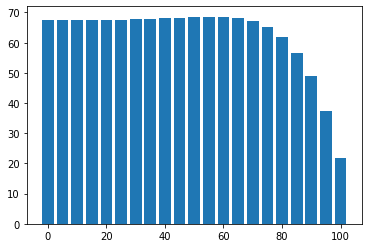

Problem 1a: 	 21.773


In [ ]:
num_buyers = 5
clock_increment = 1
num_trials = 100000

reserve_expected_profit = {}
for reserve in range(0,101,5):
  total=0
  for _ in range(num_trials):
    buyers = [random.randrange(0,101,5) for i in range(num_buyers)]
    buyers.sort()
    if reserve > buyers[-1]:
      total += 0
    else:
      second_price = buyers[-2]
      auction_price = second_price//clock_increment*clock_increment
      #we may have to increment
      total += max(auction_price,reserve)
  reserve_expected_profit[reserve] = total/num_trials

import matplotlib.pyplot as plt

print(f"Problem 1d: \n {reserve_expected_profit}")
plt.bar(list(reserve_expected_profit.keys()),list(reserve_expected_profit.values()),4)
plt.show()

# Problem 2

You are tasked with forecasting the profits of a Vegas hotel. You come up with the following model:

> $\pi(t)=\frac{750 - 50t}{n + 1}$

where $\pi(t)$ is the profit in year $t$, and n is the number of hotels the main competitor owns.
We want to forecast the expected total profit over the next $T$ years, given the following rules:



*   You begin in year 1.
*   The main competitor currently has no hotels.
*   They can only build one hotel at a time.

You can set $T = 10$, $m = 2$. To run Monte Carlo simulations of the profit, you will need to randomly generate the number of hotels the competitor has each year. An example of a valid construction profile is: {0, 1, 1, 2, 2, 2, 3, 3, 3, 3}. This can be read the following way:

*   The competitor begins building on the first year and finishes construction on the second (at that point it counts as a built hotel).
*   The competitor starts another immediately after (year 3).
*   Finally, they start a third hotel in year 6.

To be valid, the profile must be of length T and increment by at most one every other element (for $m = 2$). In the above example, the total profit over the 10 years is 3850. Find the expected profit.
(Note: I will be lenient with how you sample from the space of possible competitor build profiles.
Preferably, each possible profile will be equally likely.)








## Define parameters and functions:

In [ ]:
import random
import scipy.special

# parameters
periods = 10
build_time = 2

In [ ]:
# test case from problem

def profit(period, nbuilds):
    return (750 + 50*period)/(nbuilds + 1)

builds = [0, 1, 1, 2, 2, 2, 3, 3, 3, 3]
sum([profit(i + 1, builds[i]) for i in range(len(builds))])

3850.0

## How do we sample the build profiles?

### Coin Flip Sampling:
There are T years and each year the competitor flips a coin to determine if they build or not. If the competitor is already building a hotel we can skip/ingore the coin flip for that year.

In [ ]:
build_prob = 0.5
trials = 100000
sim_results = []
for i in range(trials):
    remaining_build_years = 0
    forcast = []
    for n in range(periods):
        if remaining_build_years == 0 and n + build_time <= periods:
            if random.random() < build_prob:
                remaining_build_years = build_time
        
        number_new_plants = 0
        if remaining_build_years == 1:
            number_new_plants = 1
        
        remaining_build_years = max(0, remaining_build_years - 1)
        
        forcast.append(number_new_plants)
    
    total = 0
    accum = []
    for v in forcast:
        total += v
        accum.append(total)
        
    total_profit = 0
    for j in range(len(accum)):
        total_profit += profit(j+1, accum[j])
        
    sim_results.append(total_profit)

# biased average profit
sum(sim_results)/trials

4745.217541666802

I stated that I would be lenient with how you sample so if you went with this method you will not lose too many points. This method is definitely biased toward under counting expected revenue. The easiest way to see the inherent bias is to look at the probability of two specific build profiles: the probability of never building vs the probability of always building. 

*   $\{0,0,0,0,0,0,0,0,0,0\}$: P(never build) $= \frac{1}{2}^{10} = 0.000977$
*   $\{0,1,1,2,2,3,3,4,4,5\}$: P(always build) $= \frac{1}{2}^5 = 0.03125$

As you can see it's much less likely to generate the never build profile than the always build profile and this bias is inherent throughout the generating process. However, we can still use this process if we account for the bias through weighted sampling. 

## Weighted Sampling

In order to account for the bias we need to calculate the probability of each profile as we draw it.

In [ ]:
build_prob = 0.5
trials = 100000
sim_results = []
for i in range(trials):
    forcast_prob = 1
    remaining_build_years = 0
    forcast = []
    for n in range(periods):
        if remaining_build_years == 0 and n + build_time <= periods:
            if random.random() < build_prob:
                remaining_build_years = build_time
                forcast_prob = forcast_prob * build_prob
            else:
                forcast_prob = forcast_prob * (1 - build_prob)
        
        number_new_plants = 0
        if remaining_build_years == 1:
            number_new_plants = 1
        
        remaining_build_years = max(0, remaining_build_years - 1)
        
        forcast.append(number_new_plants)
    
    total = 0
    accum = []
    for v in forcast:
        total += v
        accum.append(total)
        
    total_profit = 0
    for j in range(len(accum)):
        total_profit += profit(j+1, accum[j])
        
    sim_results.append([total_profit, forcast_prob])

In [ ]:
# unbiased expected profit
total_weighted_profit = 0
total_weight = 0
for i in range(trials):
    weight = 1/sim_results[i][1]
    total_weighted_profit += sim_results[i][0] * weight
    total_weight += weight

total_weighted_profit / total_weight

5324.951536305961

### Combinatorics:
The brute force approach would be to generate every possible build profile and sample from that list. However, using combinatorics we can accomplish the same thing without all the computation. We first need to notice that the number of build profiles changes based on the number of builds and then use this to count the number of build profiles for each number of builds.

In [ ]:
# list of build_time 0's and a 1 when the hotel is finished
build_value = []
for i in range(build_time - 1):
    build_value.append(0)
build_value.append(1)
idle_value = [0]

# different number of builds we can have over the horizon
num_build_values = list(range(0, periods // build_time + 1))

# number of idle values that correspond to the number of builds
num_idle_values = [periods - bv * build_time for bv in num_build_values]

# number of values associated with the number of builds
num_values = [num_build_values[i] + num_idle_values[i] for i in range(len(num_build_values))]

# given the number of values in the horizon, how many permutations exist
num_perms_per_build_val = []
for i in range(len(num_build_values)):
    num_perms_per_build_val.append(scipy.special.binom(num_values[i], num_build_values[i]))

print(f"Build Values: {num_build_values}")
print(f"Idle Values: {num_idle_values}")
print(f"Elements per Builds: {num_values}")
print(f"Permutations per Builds: {num_perms_per_build_val}")

Build Values: [0, 1, 2, 3, 4, 5]
Idle Values: [10, 8, 6, 4, 2, 0]
Elements per Builds: [10, 9, 8, 7, 6, 5]
Permutations per Builds: [1.0, 9.0, 28.0, 35.0, 15.0, 1.0]


In [ ]:
profits = []
for i in range(trials):
    nbuild = random.choices(num_build_values,num_perms_per_build_val)[0]
    nidle = periods - nbuild * build_time
    
    build_schedule = []
    for j in range(nbuild):
        build_schedule.append(build_value)
    for j in range(nidle):
        build_schedule.append(idle_value)
        
    forcast = random.sample(build_schedule,len(build_schedule))
    forcast = [v for a in forcast for v in a]
    
    total = 0
    accum = []
    for v in forcast:
        total += v
        accum.append(total)
        
    total_profit = 0
    for j in range(len(accum)):
        total_profit += profit(j+1, accum[j])
        
    profits.append(total_profit)
    
# expected profit
sum(profits)/len(profits)

5331.5621916678265

### Conway's Game of Life

Conway's Game of Life is a "game" with a simple set of rules that yields complex results. It works as follows:

- There is an NxN matrix of alive and dead cells, typically by 1's and 0's, respectively
- Each cell has 8 surrounding neighbors. Cells on the edge and the corners wrap around to the other side.
- Each period, the cells update according to the following rules:
	- If a dead cell has exactly 3 alive neighbors next to it, it becomes alive.
	- If an alive cell has either 2 or 3 alive neighbors next to it, it remains alive.
	- If an live cell has fewer than 2 alive neighbors next to it, it dies of loneliness.
	- If an alive cell has more than 3 alive neighbors next to it, it dies of overcrowding. Such is life.
- The cells should be updated independently. So, If I am a cell, and my neighbor is currently dead it must be counted as dead to me this period, even if it turns out it will be alive next period.

Program the Game of Life. Run a test by creating a 4x4 matrix with only the 4 corners alive. The four cells should remain stationary. After the test is working, create a 50x50 matrix with each cell randomly turned on or off. Run it for 100 periods. Plot it using matplotlib.pyplot.matshow. There are many ways to display the 100 matrix plots and I will leave it up to you to find an elegant solution.

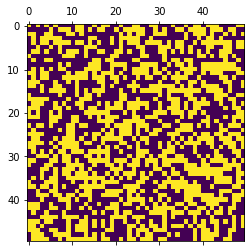

In [5]:
import random
import matplotlib.pyplot as plt

# functions
def random_grid(rows):
    return [[random.choice([0, 1]) for i in range(rows)] for j in range(rows)]

def count_neighbors(grid, cell):
    count = 0
    for i in range(-1,2,1):
        for j in range(-1,2,1):
            if i == 0 and j == 0:
                continue
            count += grid[(cell[0] + i) % len(grid[i])][(cell[1] + j) % len(grid)]
    return count
    
def check_cell(grid, cell):
    neighbor_count = count_neighbors(grid, cell)
    if neighbor_count == 3:
        return 1
    elif neighbor_count == 2:
        return grid[cell[0]][cell[1]]
    else:
        return 0
    
def next_grid(current_grid):
    updated_grid = [[0 for j in range(len(current_grid[i]))] for i in range(len(current_grid))]
    for i in range(len(current_grid)):
        for j in range(len(current_grid[i])):
            updated_grid[i][j] = check_cell(current_grid, [i, j])
    return updated_grid

import matplotlib.pyplot as plt

grid = random_grid(50)
fig,ax = plt.subplots(1,1)

def draw_frame(n):
    global grid
    figures = [fig]
    grid = next_grid(grid)
    mat.set_data(grid)
    figures.append(fig)
    return figures

mat = ax.matshow(grid)

In [6]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, draw_frame, frames=100, interval=40, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())